In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

*This notebook from* [**kaggle**](https://www.kaggle.com/poonaml/house-prices-advanced-regression-techniques/house-prices-data-exploration-and-visualisation)

In [20]:
house = pd.read_csv('train.csv')

In [24]:
house.head(n = 20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [23]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [28]:
house.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [32]:
corr = house.corr()["SalePrice"]
corr[np.argsort(corr,axis= 0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

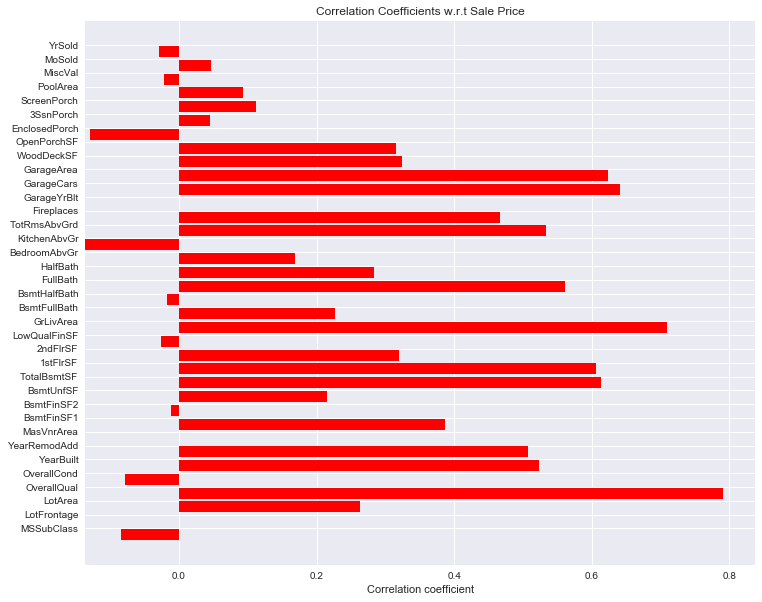

In [75]:
num_feat = house.columns[house.dtypes != 'object']
num_feat = num_feat[1:-1]
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(house[col].values, house.SalePrice.values)[0,1])

ind = np.arange(len(labels))
width =0.9
fig, ax = plt.subplots(figsize = (12,10))
ax.barh(ind, np.array(values),color = 'red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");

In [83]:
num_feat = house.columns[house.dtypes != 'object']
num_feat = num_feat[1:-1]
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(house[col].values, house.SalePrice.values)[0,1])

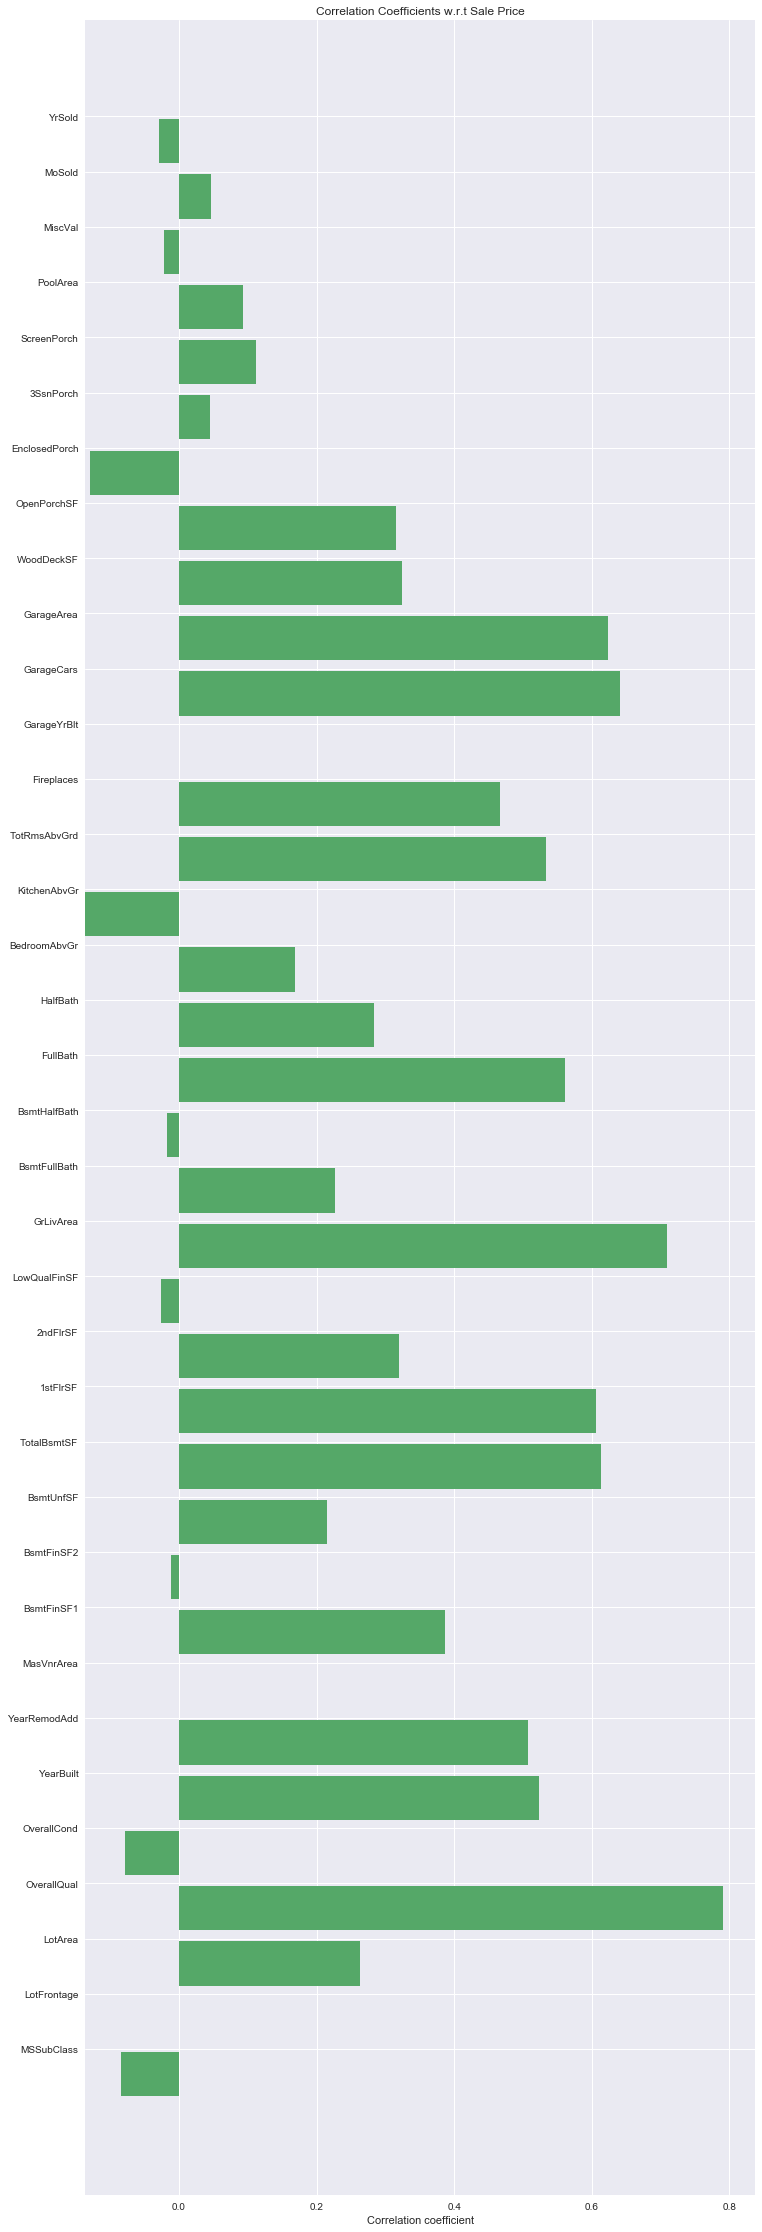

In [89]:
fig, ax = plt.subplots(figsize = (12,40))
width = 0.9
ind = np.arange(len(labels))
ax.barh(ind,np.array(values),color = 'g')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");

In [102]:
correlations = house.corr()
attrs = correlations.iloc[:-1,:-1]

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]).unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(list(set([(tuple(sorted(key)), important_corrs[key]) for key in important_corrs])),columns=['Attribute Pair', 'Correlation'])


unique_important_corrs = unique_important_corrs.ix[abs(unique_important_corrs['Correlation']).argsort()[::-1]]

print unique_important_corrs

                  Attribute Pair  Correlation
14      (GarageArea, GarageCars)     0.882475
18      (GarageYrBlt, YearBuilt)     0.825667
6      (GrLivArea, TotRmsAbvGrd)     0.825489
22       (1stFlrSF, TotalBsmtSF)     0.819530
7          (2ndFlrSF, GrLivArea)     0.687501
9   (BedroomAbvGr, TotRmsAbvGrd)     0.676620
19    (BsmtFinSF1, BsmtFullBath)     0.649212
3    (GarageYrBlt, YearRemodAdd)     0.642277
21         (FullBath, GrLivArea)     0.630012
24      (2ndFlrSF, TotRmsAbvGrd)     0.616423
2           (2ndFlrSF, HalfBath)     0.609707
20     (GarageCars, OverallQual)     0.600671
16      (GrLivArea, OverallQual)     0.593007
13     (YearBuilt, YearRemodAdd)     0.592855
25     (GarageCars, GarageYrBlt)     0.588920
8       (OverallQual, YearBuilt)     0.572323
10         (1stFlrSF, GrLivArea)     0.566024
17     (GarageArea, GarageYrBlt)     0.564567
4      (GarageArea, OverallQual)     0.562022
15      (FullBath, TotRmsAbvGrd)     0.554784
5    (OverallQual, YearRemodAdd)  

**HeatMap**

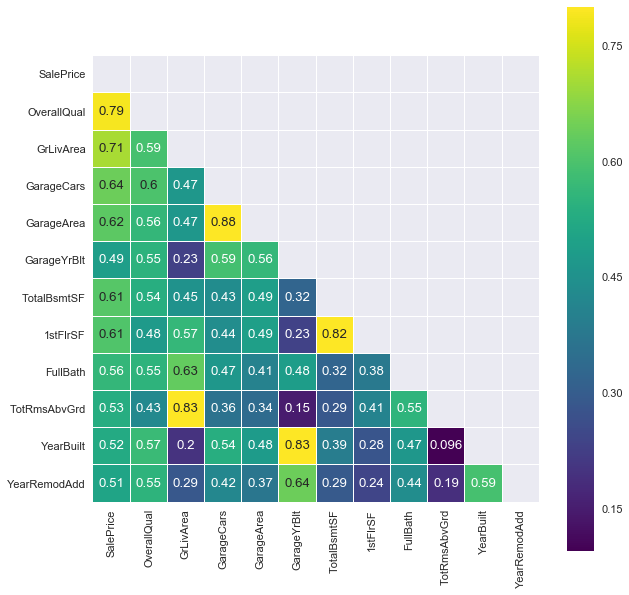

In [114]:
corrMatrix=house[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrMatrix,vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")

In [110]:
print type(corrMatrix)

<class 'pandas.core.frame.DataFrame'>
